In this assisgnment we should create a Jupyter notebook and explain all steps about the data-driven consumption prediction project.

First, we should import the modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

importing the external files

In [4]:
ExternalFilesFolder =  r"C:\Users\My\Desktop\Laurea Magistrale\1st sem\ENERGY AND ENVIRONMENTAL TECHNOLOGIES FOR BUILDING SYSTEMS\files cloned\22.11.18-cloning\python4ScientificComputing_Numpy_Pandas_MATPLotLIB\ExternalFiles"
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"

path_consumptionFile = os.path.join(ExternalFilesFolder,ConsumptionFileName)
path_TemperatureFile = os.path.join(ExternalFilesFolder,TemperatureFileName)
path_IrradianceFile = os.path.join(ExternalFilesFolder,IrradianceFileName)


To read the AC consumption 

In [6]:
DF_consumption = pd.read_csv(path_consumptionFile,sep=",", index_col=0)

It shows me values of consumptions

In [10]:
DF_consumption.head()
DF_consumption.tail(10)

,air conditioner_5545
2014-12-30 20:00:00,0.0
2014-12-30 21:00:00,0.0
2014-12-30 22:00:00,0.0
2014-12-30 23:00:00,0.0
2014-12-31 00:00:00,0.0
2014-12-31 01:00:00,NaN
2014-12-31 02:00:00,NaN
2014-12-31 03:00:00,NaN
2014-12-31 04:00:00,NaN
2014-12-31 05:00:00,NaN


In this part, we are converting the indexies, coloumn to date time.

In [11]:
PreviousIndex = DF_consumption.index
NewParsedIndex= pd.to_datetime(PreviousIndex)
DF_consumption.index =NewParsedIndex 

with these commands we will see the index of the hours, day (weekly) and month of the consumption.

In [12]:
DF_consumption.head()
DF_consumption.index.hour
DF_consumption.index.month
DF_consumption.index.dayofweek

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
           dtype='int64', length=8736)

We can specify a time and we can plot its consumption.

This is our specified time:

In [13]:
DF_consumption_someDaysInJuly=DF_consumption["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

First way to plot:

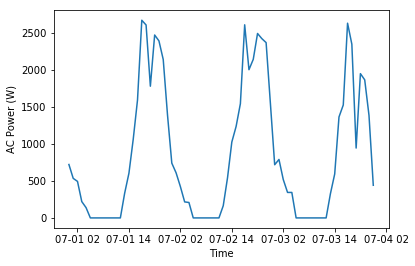

In [14]:
plt.figure()
plt.plot(DF_consumption_someDaysInJuly)
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()

And the second way of the plotting:

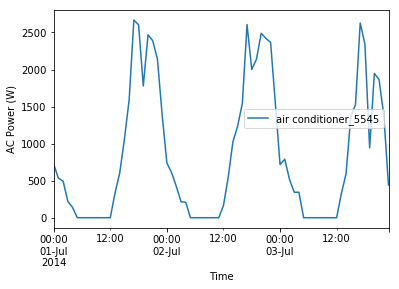

In [15]:
plt.figure()
DF_consumption_someDaysInJuly.plot()
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()

Now, we will do same commands for "Temperature"

Importing the weather data - temperature

In [16]:
DF_weather = pd.read_csv(path_TemperatureFile,sep=";",index_col=0)
DF_weather.head(24)
previousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(previousIndex_weather)
DF_weather.index = newIndex_weather
DF_weather.columns
Series_Temperature = DF_weather["temperature"]

DF_Temperature= DF_weather[["temperature"]]
DF_Temperature.head()

,temperature
localhour,
2014-01-01 06:00:00,40.36
2014-01-01 07:00:00,38.11
2014-01-01 08:00:00,38.65
2014-01-01 09:00:00,38.47
2014-01-01 10:00:00,38.00


For Irradiance, importing Irradiance Source Generation

In [17]:
DF_irradianceSource = pd.read_csv(path_IrradianceFile,sep=";",index_col=1)
DF_irradianceSource.head(24)

DF_irradiance=DF_irradianceSource[["gen"]]
DF_irradiance.head(24)

DF_irradiance["gen"]<0
DF_irradiance[DF_irradiance["gen"]<0] = 0
DF_irradiance.head(24)

C:\Users\My\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\My\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\My\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-

,gen
localhour,
2014-01-01 00:00:00,0.000000
2014-01-01 01:00:00,0.000000
2014-01-01 02:00:00,0.000000
2014-01-01 03:00:00,0.000000
2014-01-01 04:00:00,0.000000
2014-01-01 05:00:00,0.000000
2014-01-01 06:00:00,0.000000
2014-01-01 07:00:00,0.052800
2014-01-01 08:00:00,0.773583


to merge in a plot of temperature, consumption and ırradıance

In [19]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_joined.head(24)
DF_joined_cleaned = DF_joined.dropna()
DF_joined_cleaned.head(24)
DF_joined_cleaned_copy = DF_joined.dropna().copy()

For the selected dates, we should do the same 
 ".dropna" command removes missing values 

In [20]:
DF_joined_cleanedchosenDates=DF_joined_cleaned_copy["2014-08-01":"2014-08-02"]

DF_joined_cleanedchosenDates["temperature"]=DF_joined_cleanedchosenDates["temperature"].shift(-5)
DF_joined_cleanedchosenDates.dropna()
DF_joined_cleanedchosenDates.head()
DF_joined_cleanedchosenDates.describe()

C:\Users\My\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,air conditioner_5545,temperature,gen
count,48.000000,43.000000,48.000000
mean,694.410764,78.729767,1.143401
std,774.386052,6.499446,1.428003
min,0.000000,67.390000,0.000000
25%,0.000000,73.845000,0.000000
50%,484.775000,77.340000,0.278442
75%,1157.812500,85.440000,2.303383
max,2371.566667,88.980000,4.165450


We should normalized all the variables 

In [21]:
DF_joined_cleanedchosenDates.min()
DF_joined_cleanedchosenDates.max()
DF_joined_cleanedchosenDates_normalized=(DF_joined_cleanedchosenDates-DF_joined_cleanedchosenDates.min())/(DF_joined_cleanedchosenDates.max()-DF_joined_cleanedchosenDates.min())
DF_joined_cleanedchosenDates_normalized.plot()

In [22]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_mod=DF_joined.copy() 
DF_mod["temperature"]=DF_mod["temperature"].shift(-5)
DF_mod.dropna(inplace=True) 
DF_mod=DF_mod.dropna()
DF_mod.head()
DF_mod.describe()

,air conditioner_5545,temperature,gen
count,8670.000000,8670.000000,8670.000000
mean,345.707233,67.717625,0.975530
std,655.969001,16.256376,1.421250
min,0.000000,20.730000,0.000000
25%,0.000000,56.630000,0.000000
50%,0.000000,70.250000,0.012317
75%,411.575000,79.480000,1.669108
max,2841.000000,101.050000,5.099667


To shift the variables

In [24]:
DF_mod["Temperature -1h"]=DF_mod["temperature"].shift(1)
DF_mod["Temperature -2h"]=DF_mod["temperature"].shift(2)
DF_mod["Temperature -3h"]=DF_mod["temperature"].shift(3)
DF_mod["Temperature -4h"]=DF_mod["temperature"].shift(4)
DF_mod["Temperature -5h"]=DF_mod["temperature"].shift(5)
DF_mod["Temperature -6h"]=DF_mod["temperature"].shift(6)

Instead of writing too much shifting command we can use functions

In [25]:
range(3,12,1)
lag_start=1
lag_end=6
lg_interval=1

column_name="temperature"
df=DF_mod


for i in range(lag_start,lag_end+1, lg_interval): 
    new_column_name= column_name+ " - " + str(i) + "hr"
    print new_column_name
    df[new_column_name]=df[column_name].shift(i)
    df.dropna(inplace=True)
    
    
df.head()



def lag_future(df, column_name, lag_start,lag_end,lg_interval):
    for i in range(lag_start,lag_end+1, lg_interval): 
        new_column_name= column_name+ " - " + str(i) + "hr"
        print new_column_name
        df[new_column_name]=df[column_name].shift(i)
        df.dropna(inplace=True)
    return df

temperature - 1hr
temperature - 2hr
temperature - 3hr
temperature - 4hr
temperature - 5hr
temperature - 6hr


Now we can apply it all variables

In [28]:


DF_mod= DF_mod.rename(columns={"air conditioner_5545":"AC_consumption", "gen":"irradiance"})

DF_mod= lag_future(DF_mod, "temperature",1,6,1)
DF_mod.head()



DF_mod= lag_future(DF_mod, "irradiance",3,6,1)



DF_mod= lag_future(DF_mod, "AC_consumption",1,24,1)

DF_mod.head()
DF_mod.describe()

temperature - 1hr
temperature - 2hr
temperature - 3hr
temperature - 4hr
temperature - 5hr
temperature - 6hr
irradiance - 3hr
irradiance - 4hr
irradiance - 5hr
irradiance - 6hr
AC_consumption - 1hr
AC_consumption - 2hr
AC_consumption - 3hr
AC_consumption - 4hr
AC_consumption - 5hr
AC_consumption - 6hr
AC_consumption - 7hr
AC_consumption - 8hr
AC_consumption - 9hr
AC_consumption - 10hr
AC_consumption - 11hr
AC_consumption - 12hr
AC_consumption - 13hr
AC_consumption - 14hr
AC_consumption - 15hr
AC_consumption - 16hr
AC_consumption - 17hr
AC_consumption - 18hr
AC_consumption - 19hr
AC_consumption - 20hr
AC_consumption - 21hr
AC_consumption - 22hr
AC_consumption - 23hr
AC_consumption - 24hr


,AC_consumption,temperature,irradiance,Temperature -1h,Temperature -2h,Temperature -3h,Temperature -4h,Temperature -5h,Temperature -6h,temperature - 1hr,...,AC_consumption - 15hr,AC_consumption - 16hr,AC_consumption - 17hr,AC_consumption - 18hr,AC_consumption - 19hr,AC_consumption - 20hr,AC_consumption - 21hr,AC_consumption - 22hr,AC_consumption - 23hr,AC_consumption - 24hr
count,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,...,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000
mean,360.900868,68.507741,0.980320,68.508980,68.509406,68.509747,68.510064,68.510282,68.510261,68.508980,...,360.900868,360.900868,360.900868,360.900868,360.900868,360.900868,360.900868,360.900868,360.900868,360.900868
std,666.126703,15.937529,1.422278,15.935713,15.935002,15.934430,15.933920,15.933568,15.933601,15.935713,...,666.126703,666.126703,666.126703,666.126703,666.126703,666.126703,666.126703,666.126703,666.126703,666.126703
min,0.000000,22.920000,0.000000,22.920000,22.920000,22.920000,22.920000,22.920000,22.920000,22.920000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.800000,0.000000,57.800000,57.800000,57.800000,57.800000,57.800000,57.800000,57.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,71.440000,0.014450,71.440000,71.440000,71.440000,71.440000,71.440000,71.440000,71.440000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,461.966667,79.990000,1.673900,79.990000,79.990000,79.990000,79.990000,79.990000,79.990000,79.990000,...,461.966667,461.966667,461.966667,461.966667,461.966667,461.966667,461.966667,461.966667,461.966667,461.966667
max,2841.000000,101.050000,5.099667,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,...,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000


let's add the seasonality parameters (time-related parameters)

In [29]:
DF_mod["hour"]=DF_mod.index.hour
DF_mod["hour"].head()
DF_mod["sin_hour"]= np.sin(DF_mod.index.hour*2*np.pi/24)  
DF_mod["cos_hour"]= np.cos(DF_mod.index.hour*2*np.pi/24)
DF_mod[["hour", "sin_hour", "cos_hour"]].head(24)
DF_mod["day of week"]= DF_mod.index.dayofweek  
DF_mod["month"]= DF_mod.index.month
DF_mod["week of the year"]= DF_mod.index.week
DF_mod[["hour", "sin_hour", "cos_hour", "day of week", "month", "week of the year"]].head(24)

,hour,sin_hour,cos_hour,day of week,month,week of the year
2014-01-16 11:00:00,11,2.588190e-01,-9.659258e-01,3,1,3
2014-01-16 12:00:00,12,1.224647e-16,-1.000000e+00,3,1,3
2014-01-16 13:00:00,13,-2.588190e-01,-9.659258e-01,3,1,3
2014-01-16 14:00:00,14,-5.000000e-01,-8.660254e-01,3,1,3
2014-01-16 15:00:00,15,-7.071068e-01,-7.071068e-01,3,1,3
2014-01-16 16:00:00,16,-8.660254e-01,-5.000000e-01,3,1,3
2014-01-16 17:00:00,17,-9.659258e-01,-2.588190e-01,3,1,3
2014-01-16 18:00:00,18,-1.000000e+00,-1.836970e-16,3,1,3
2014-01-16 19:00:00,19,-9.659258e-01,2.588190e-01,3,1,3
2014-01-16 20:00:00,20,-8.660254e-01,5.000000e-01,3,1,3


Now we can write a function that shows it is week day or not. Also, in the second function, it shows data is in the working time or not.
Lastly, corr command makes correlation

In [31]:
day=2
def WeekendDetector(day):
    if (day==5 or day==6):
        weekendlabel=1
    else:
        weekendlabel=0
    return weekendlabel
DF_mod["Weekend"]=DF_mod["day of week"].apply(WeekendDetector)

def dayDetector(hour):
    if (hour< 19 and hour>9):
        daylabel=1
    else:
        daylabel=0
    return daylabel
DF_mod["workingtime"]=DF_mod["hour"].apply(dayDetector)

DF_mod.corr()

,AC_consumption,temperature,irradiance,Temperature -1h,Temperature -2h,Temperature -3h,Temperature -4h,Temperature -5h,Temperature -6h,temperature - 1hr,...,AC_consumption - 23hr,AC_consumption - 24hr,hour,sin_hour,cos_hour,day of week,month,week of the year,Weekend,workingtime
AC_consumption,1.000000,0.568703,-0.012347,0.608666,0.637029,0.650343,0.648050,0.630500,0.598835,0.608666,...,0.849166,0.899758,0.361724,-0.439404,0.212874,-0.015011,0.126353,0.137572,-0.007009,-0.008262
temperature,0.568703,1.000000,0.329556,0.990934,0.968216,0.935012,0.894745,0.850655,0.805643,0.990934,...,0.577911,0.538523,0.243245,-0.332523,-0.146625,0.037895,0.157260,0.187882,0.035621,0.277597
irradiance,-0.012347,0.329556,1.000000,0.240539,0.142894,0.045610,-0.043136,-0.116750,-0.171127,0.240539,...,0.092563,-0.024947,0.167481,-0.237885,-0.740422,-0.028709,-0.033479,-0.025697,-0.030896,0.767559
Temperature -1h,0.608666,0.990934,0.240539,1.000000,0.990922,0.968199,0.934994,0.894721,0.850628,1.000000,...,0.606463,0.577935,0.262795,-0.359296,-0.055125,0.036790,0.157909,0.188614,0.035554,0.207759
Temperature -2h,0.637029,0.968216,0.142894,0.990922,1.000000,0.990921,0.968197,0.934990,0.894718,0.990922,...,0.620493,0.606475,0.269861,-0.361433,0.040283,0.035804,0.158672,0.189422,0.035430,0.121306
Temperature -3h,0.650343,0.935012,0.045610,0.968199,0.990921,1.000000,0.990921,0.968196,0.934990,0.968199,...,0.619433,0.620503,0.261077,-0.338808,0.133001,0.035148,0.159492,0.190245,0.035602,0.029872
Temperature -4h,0.648050,0.894745,-0.043136,0.934994,0.968197,0.990921,1.000000,0.990920,0.968195,0.934994,...,0.604003,0.619442,0.231681,-0.292972,0.216670,0.034678,0.160352,0.191078,0.036046,-0.058310
Temperature -5h,0.630500,0.850655,-0.116750,0.894721,0.934990,0.968196,0.990920,1.000000,0.990920,0.894721,...,0.574998,0.604009,0.176714,-0.227073,0.285600,0.034321,0.161292,0.191895,0.036484,-0.137429
Temperature -6h,0.598835,0.805643,-0.171127,0.850628,0.894718,0.934990,0.968195,0.990920,1.000000,0.850628,...,0.535349,0.574998,0.102380,-0.145609,0.335084,0.033991,0.162286,0.192705,0.036819,-0.204386
temperature - 1hr,0.608666,0.990934,0.240539,1.000000,0.990922,0.968199,0.934994,0.894721,0.850628,1.000000,...,0.606463,0.577935,0.262795,-0.359296,-0.055125,0.036790,0.157909,0.188614,0.035554,0.207759
